In [13]:
# data
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import KFold, LeavePOut, LeaveOneOut, \
    ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, GroupKFold, \
    train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Decision tree print
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


## Mushrooms

In [57]:
mushrooms_df = pd.read_csv('data/mushrooms/training_mush.csv')
X_test = pd.read_csv('data/mushrooms/testing_mush.csv')
y_test = pd.read_csv('data/mushrooms/testing_y_mush.csv')
X_train = mushrooms_df.drop('class', axis=1)
y_train = mushrooms_df['class']

In [41]:
params = {'n_estimators': range(10, 51, 10),
         'max_depth': range(1, 13, 2),
         'min_samples_leaf': range(1, 8),
         'min_samples_split': range(2, 10, 2)}
clf_rf = RandomForestClassifier(random_state=0)
gsearch_rf = GridSearchCV(estimator=clf_rf, param_grid=params, cv=3)

In [44]:
assert X_train.shape[1] == X_test.shape[1], f'Shapes do not match! {X_train.shape} != {X_test.shape}'

In [45]:
gsearch_rf.fit(X_train, y_train)

gsearch_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

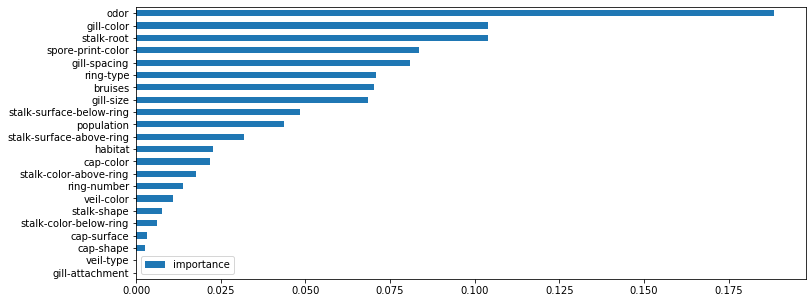

In [46]:
clf_rf = gsearch_rf.best_estimator_

imp = pd.DataFrame(clf_rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance', ascending=True).plot(kind='barh', figsize=(12, 5))

In [47]:
y_predict = clf_rf.predict(X_test)

In [91]:
pd.Series(y_predict).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

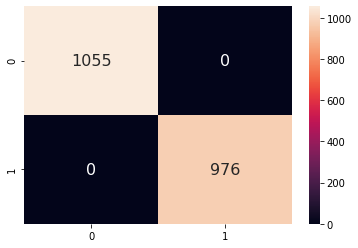

In [68]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g')

In [60]:
cm

array([[1055,    0],
       [   0,  976]])

In [ ]:
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)

## Invasion

In [77]:
invasion_train_df = pd.read_csv(r'data/invasion/invasion.csv')
invasion_test_df = pd.read_csv(r'data/invasion/operative_information.csv')

X_train = invasion_train_df.drop('class', axis=1)
y_train = invasion_train_df['class']
X_test = invasion_test_df

assert X_train.shape[1] == X_test.shape[1], f'Shapes do not match: {X_train.shape[1]} != {X_test.shape[1]}'

In [74]:
invasion_train_df.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [80]:
params = {'max_depth': range(1, 20, 4),
         'min_samples_split': range(2, 6), 
         'min_samples_leaf': range(1, 5),
         'n_estimators': range(7, 15)}
clf_rf = RandomForestClassifier()
gsearch = GridSearchCV(estimator=clf_rf, param_grid=params, cv=3)

In [81]:
gsearch.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [83]:
gsearch.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 7}

In [82]:
y_predict = gsearch.predict(X_test)

In [90]:
pd.Series(y_predict).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

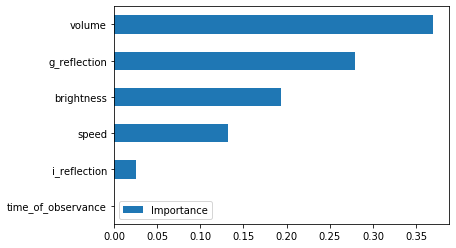

In [95]:
clf_rf = gsearch.best_estimator_
imp = pd.DataFrame(clf_rf.feature_importances_, index=X_train.columns, columns=['Importance'])
imp.sort_values('Importance').plot(kind='barh')

In [96]:
reasons_df = pd.read_csv('data/invasion/space_can_be_a_dangerous_place.csv')
reasons_df.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


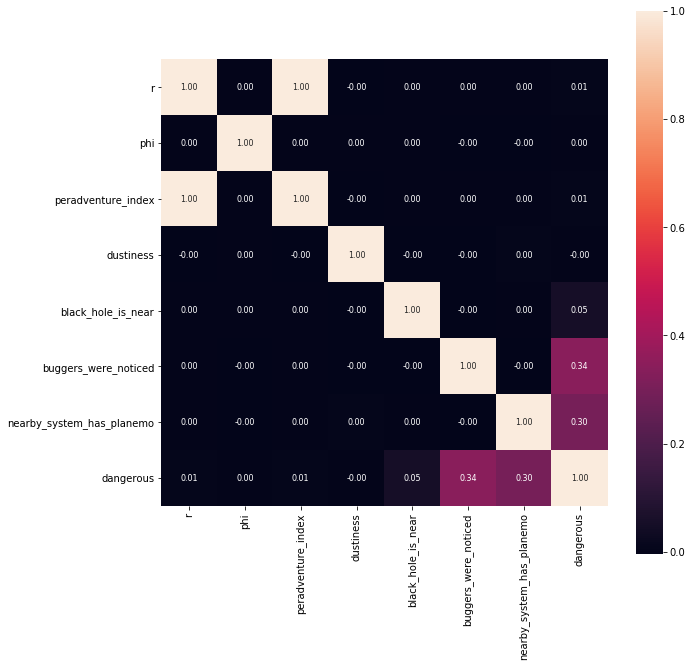

In [97]:
corr = reasons_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cbar=True, annot=True, square=True, 
            fmt='.2f', annot_kws={'size': 8},
            yticklabels=corr.columns.values, xticklabels=corr.columns.values)